## Forecasting Type
- Univariate multistep time series forecasting

## Approach/Model
- Deep Learning (LSTM Recurrent Neural Networks)

## Evaluation Metrics
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- Root Mean Square Error (RMSE)


In [ ]:
import matplotlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.api.models import Sequential
from keras.api.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, TimeDistributed
from keras.api.metrics import RootMeanSquaredError

In [7]:
df_enso = pd.read_csv('./ENSO.csv', parse_dates=[0])
df_enso.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [8]:
df_enso.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          882 non-null    datetime64[ns]
 1   Year                          882 non-null    int64         
 2   Month                         882 non-null    object        
 3   Global Temperature Anomalies  882 non-null    float64       
 4   Nino 1+2 SST                  498 non-null    float64       
 5   Nino 1+2 SST Anomalies        498 non-null    float64       
 6   Nino 3 SST                    498 non-null    float64       
 7   Nino 3 SST Anomalies          498 non-null    float64       
 8   Nino 3.4 SST                  498 non-null    float64       
 9   Nino 3.4 SST Anomalies        498 non-null    float64       
 10  Nino 4 SST                    498 non-null    float64       
 11  Nino 4 SST Anomalies          49

In [9]:
df_enso.describe()


,Date,Year,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,MEI.v2,ONI
count,882,882.000000,882.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,875.000000,882.000000,574.0000,870.000000,534.000000,882.000000
mean,1986-09-15 21:24:53.877551040,1986.251701,0.337971,23.250542,-0.049859,25.967731,-0.065743,27.016325,-0.079859,28.451727,-0.100904,-0.418517,-0.109002,0.0500,0.154138,-0.067228,-0.003175
min,1950-01-01 00:00:00,1950.000000,-0.370000,19.060000,-1.900000,23.380000,-2.160000,24.560000,-2.220000,26.360000,-1.870000,-3.376000,-3.650000,-2.8000,-3.600000,-2.500000,-2.000000
25%,1968-05-08 18:00:00,1968.000000,0.060000,21.220000,-0.740000,24.985000,-0.650000,26.340000,-0.670000,28.000000,-0.570000,-1.458500,-0.787500,-0.6000,-0.400000,-0.800000,-0.600000
50%,1986-09-16 00:00:00,1986.000000,0.300000,23.140000,-0.240000,25.935000,-0.170000,27.060000,-0.110000,28.560000,-0.020000,-0.497000,-0.080000,0.1000,0.200000,-0.100000,-0.100000
75%,2005-01-24 06:00:00,2005.000000,0.610000,25.230000,0.440000,26.902500,0.417500,27.690000,0.440000,28.977500,0.370000,0.384500,0.600000,0.7000,0.800000,0.500000,0.500000
max,2023-06-01 00:00:00,2023.000000,1.340000,28.510000,4.030000,28.810000,3.070000,29.540000,2.720000,30.220000,1.550000,4.227000,2.870000,2.3000,2.900000,2.700000,2.600000
std,NaN,21.230643,0.345478,2.328832,1.046806,1.233975,0.853805,0.945222,0.829843,0.679232,0.634455,1.361371,1.034818,0.9789,0.940521,0.987631,0.832301


In [10]:
df_enso.isna().sum(axis=0)


Date                              0
Year                              0
Month                             0
Global Temperature Anomalies      0
Nino 1+2 SST                    384
Nino 1+2 SST Anomalies          384
Nino 3 SST                      384
Nino 3 SST Anomalies            384
Nino 3.4 SST                    384
Nino 3.4 SST Anomalies          384
Nino 4 SST                      384
Nino 4 SST Anomalies            384
TNI                               7
PNA                               0
OLR                             308
SOI                              12
Season (2-Month)                  0
MEI.v2                          348
Season (3-Month)                  0
ONI                               0
Season (12-Month)                 0
ENSO Phase-Intensity              6
dtype: int64

In [11]:
df_enso.set_index('Date', inplace = True)
df_enso.head(5)


,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


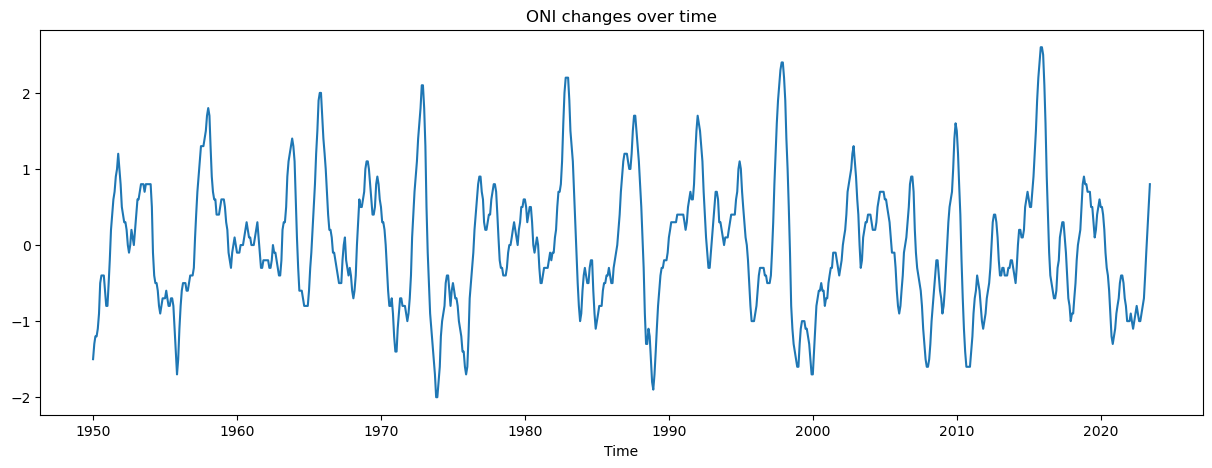

In [12]:
# ONI time series
plt.figure(figsize=(15,5))
plt.plot(df_enso.ONI)
plt.title('ONI changes over time')
plt.xlabel('Time')
plt.show()


In [13]:
# ONI interactive time series
plot = px.line(data_frame=df_enso, y='ONI', labels={'Date':'Time'},
               title='ONI changes over time')
plot.show()

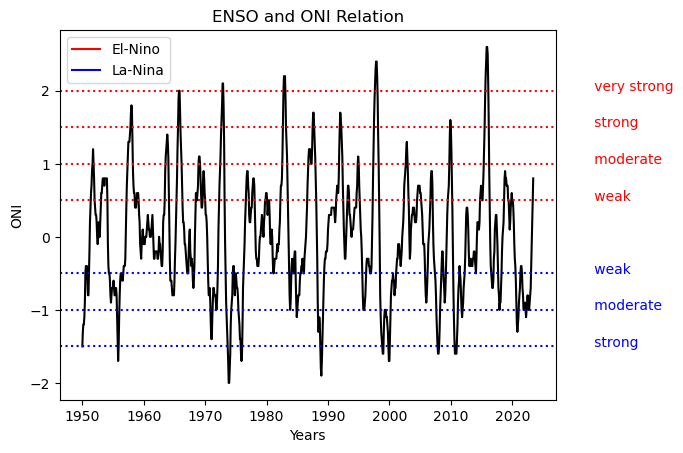

In [14]:
x = matplotlib.dates.date2num(df_enso.index)

# plot Year and ONI
plt.plot(df_enso.ONI, color='black')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.title('ENSO and ONI Relation')

# add horizontal lines and labels to define ENSO phase and intensity

plt.axhline(y=2, color='r', linestyle=':')
plt.text(x=x[-1], y=2, color='red', s='              very strong')

plt.axhline(y=1.5, color='r', linestyle=':')
plt.text(x=x[-1], y=1.5, color='red', s='              strong')

plt.axhline(y=1, color='r', linestyle=':')
plt.text(x[-1], 1, color='r', s='              moderate')

plt.axhline(y=0.5, color='r', linestyle=':')
plt.text(x[-1], 0.5, color='r', s='              weak')

plt.axhline(y=-0.5, color='b', linestyle=':')
plt.text(x[-1], -0.5, color='b', s='              weak')

plt.axhline(y=-1, color='b', linestyle=':')
plt.text(x[-1], -1, color='b', s='              moderate')

plt.axhline(y=-1.5, color='b', linestyle=':')
plt.text(x[-1], -1.5, color='b', s='              strong')

# custom legends
line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
plt.legend(handles=[line_red, line_blue])

plt.show()

In [15]:
df_enso.ONI.isna().sum(axis=0)


0

In [16]:
def series_to_supervised(data, n_in=1, n_out=1, n_vars=1, forecast_all=True, 
                         dropnan=True):
    """
    Frame a time series as a supervised learning dataset
    Parameters:
        data: Sequence of observations, type = dataframe
        n_in: prior timesteps or Number of lag observations as input (x)
        n_out: next timesteps or Number of ahead observations as output (y)
        n_vars: number of variables or number of columns
        forecast_all: to forecast all or one variable
        dropnan: Boolean whether or not to drop rows with NaN values
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    cols, names = list(), list()
    
    if n_vars == 1:    # univariate
        # input sequence or previous timesteps (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names.append(f'var1 (t-{i})')
        # current time steps (t)
        cols.append(data)
        names.append('var1 (t)')
        # forecast sequence or next timesteps (t+1, ... t+n)
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names.append(f'var1 (t+{i})')
    elif forecast_all:    # mutlivariate type 1
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data)
        names += [f'var{j+1} (t)' for j in range(n_vars)]
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names += [f'var{j+1} (t+{i})'for j in range(n_vars)]
    else:    # multivariate type 2
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data.iloc[:, -1])
        names.append('VAR (t)')
        for i in range(1, n_out):
            cols.append(data.shift(-i).iloc[:,-1])
            names.append(f'VAR (t+{i})')
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
# specify the size of the sliding window (n_lag, n_ahead)
# use the ONI of the previous time steps (e.g. previous 12 months) to predict the ONI of the next time steps (e.g. next 2 months)

n_in = 12
n_out = 3

In [18]:
# timesteps & features
n_steps = n_in                  
n_features = 1   # we are using only one feature/variable i.e oni 


In [19]:

df_reframed = series_to_supervised(df_enso['ONI'], n_in, n_out, n_features)
df_reframed

,var1 (t-12),var1 (t-11),var1 (t-10),var1 (t-9),var1 (t-8),var1 (t-7),var1 (t-6),var1 (t-5),var1 (t-4),var1 (t-3),var1 (t-2),var1 (t-1),var1 (t),var1 (t+1),var1 (t+2)
Date,,,,,,,,,,,,,,,
1951-01-01,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2
1951-02-01,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2
1951-03-01,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4
1951-04-01,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1951-05-01,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-1.0,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8,-0.7,-0.4
2023-01-01,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8,-0.7,-0.4,-0.1
2023-02-01,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8,-0.7,-0.4,-0.1,0.2


In [20]:
# train-validation-test split (80:10:10)

n = df_reframed.shape[0]       
n_train, n_valid = int(0.8 * n), int(0.1 * n)
df_train = df_reframed.values[:n_train, :]
df_valid = df_reframed.values[n_train:n_train + n_valid, :]
df_test = df_reframed.values[n_train + n_valid:, :]

In [21]:
x_train, y_train,= df_train[:, :-n_out], df_train[:, -n_out:]
x_valid, y_valid = df_valid[:, :-n_out], df_valid[:, -n_out:]
x_test, y_test =  df_test[:, :-n_out], df_test[:, -n_out:]

In [22]:
# normalize data
# use separate scalers for features(x) and labels/target (y), to easily revert the scaling later

x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler =  MinMaxScaler(feature_range=(0,1))

x_train, y_train = x_scaler.fit_transform(x_train),y_scaler.fit_transform(y_train)
x_valid, y_valid = x_scaler.transform(x_valid), y_scaler.transform(y_valid)
x_test, y_test = x_scaler.transform(x_test), y_scaler.transform(y_test)

In [23]:
# reshape input [samples (rows), timesteps, features]
x_train = x_train.reshape(x_train.shape[0], n_steps, n_features)
x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_features)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_features)

In [24]:
# design network
model = Sequential(name='lstm')
model.add(LSTM(50, input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(units = 50))
model.add(Dense(n_out))
model.summary()

Model: "lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,753 (120.13 KB)

 Trainable params: 30,753 (120.13 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# compile & train network
model.compile(loss='mean_squared_error', optimizer='adam',
                   metrics=['mae', 'mape', RootMeanSquaredError()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                           shuffle=False, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
22/22 - 1s - 52ms/step - loss: 0.0753 - mae: 0.2124 - mape: 1213331.1250 - root_mean_squared_error: 0.2744 - val_loss: 0.0494 - val_mae: 0.1695 - val_mape: 49.1540 - val_root_mean_squared_error: 0.2222
Epoch 2/50
22/22 - 0s - 4ms/step - loss: 0.0327 - mae: 0.1363 - mape: 1246971.2500 - root_mean_squared_error: 0.1810 - val_loss: 0.0393 - val_mae: 0.1502 - val_mape: 51.8336 - val_root_mean_squared_error: 0.1983
Epoch 3/50
22/22 - 0s - 4ms/step - loss: 0.0288 - mae: 0.1284 - mape: 1290218.3750 - root_mean_squared_error: 0.1696 - val_loss: 0.0383 - val_mae: 0.1484 - val_mape: 50.2551 - val_root_mean_squared_error: 0.1958
Epoch 4/50
22/22 - 0s - 4ms/step - loss: 0.0274 - mae: 0.1252 - mape: 1275574.8750 - root_mean_squared_error: 0.1654 - val_loss: 0.0372 - val_mae: 0.1463 - val_mape: 49.2428 - val_root_mean_squared_error: 0.1928
Epoch 5/50
22/22 - 0s - 4ms/step - loss: 0.0260 - mae: 0.1222 - mape: 1225924.7500 - root_mean_squared_error: 0.1614 - val_loss: 0.0356 - val_mae: 0.14

In [26]:
model.save('model_lstm.h5')

In [27]:
eval_lstm = model.evaluate(x=x_test, y=y_test, return_dict=True)
eval_lstm

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - mae: 0.0571 - mape: 15.9073 - root_mean_squared_error: 0.0701 


{'loss': 0.0047267586924135685,
 'mae': 0.05503581836819649,
 'mape': 15.951788902282715,
 'root_mean_squared_error': 0.06875142455101013}

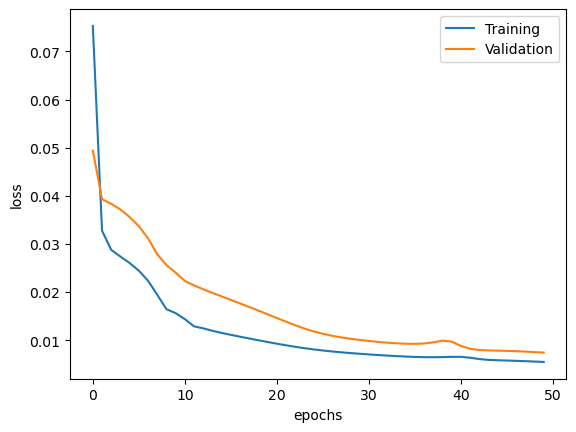

In [28]:
plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [29]:
y_hat = model.predict(x_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [30]:
y_hat = np.round(y_scaler.inverse_transform(y_hat), 1)


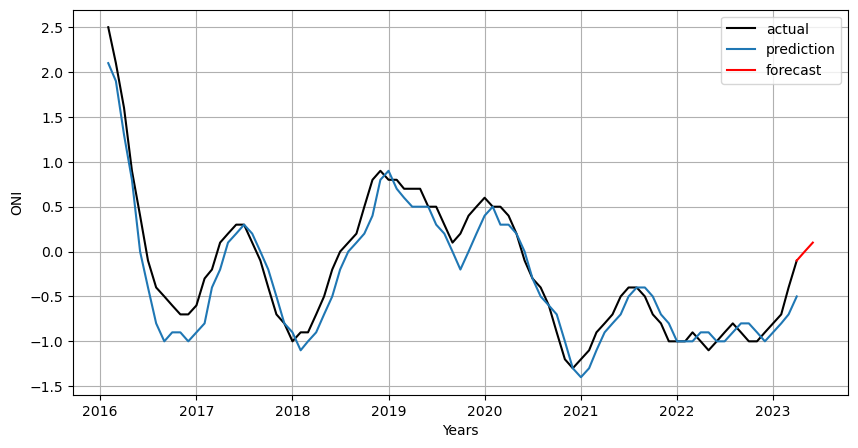

In [31]:
y_start = n_train + n_valid + 1

# oni actual values
y_actual = pd.DataFrame(index = df_reframed.index[y_start:],
                        data = y_scaler.inverse_transform(y_test)[:-1, 0])

# oni predicted values
y_predict = pd.DataFrame(index = df_reframed.index[y_start:],
                         data = y_hat[:-1, 0])

# oni forecast values
y_forecast = pd.DataFrame(index = pd.date_range(start=df_reframed.index[-1], 
                                                periods=n_out, freq= 'MS'),
                          data = y_hat[-1, :])

plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='actual', color='k')
plt.plot(y_predict, label='prediction')
plt.plot(y_forecast, label='forecast', color='r')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.legend()
plt.grid()
plt.show()